### OBJECTIF : Prédire le type de vin et la qualité du vin en fonction de ses attributs

In [1]:
import os 

os.getcwdb()
os.chdir('C:\\Users\\bilal\\Desktop\\ML')

In [2]:
os.getcwdb()

b'C:\\Users\\bilal\\Desktop\\ML'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

red = pd.read_csv("Wine/winequality-red.csv",sep=';')
white = pd.read_csv("Wine/winequality-white.csv",sep=';')


### Analyse Descriptive

In [4]:
red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality type  
0         9.4        5  red  
1         9.8        5  red  
2         9.8        5  red  
3         9.8        6  red  
4         9.4        5  red  
...       ...      ...  ...  
1594     10.5        5  red  
1595     11.2        6  red  
1596     11.0        6  red  
1597     10.2        5  red  
1598     11.0        6  red  

[1599 rows x 13 columns]

In [5]:
white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
0         8.8        6  white  
1         9.5        6  white  
2        10.1        6  white  
3         9.9        6  white  
4         9.9        6  white  
...       ...      ...    ...  
4893     11.2        6  white  
4894      9.6        5  white  
4895      9.4        6  white  
4896     12.8        7  white  
4897     11.8        6  white  

[4898 rows x 13 columns]

In [6]:
wine_df = pd.concat([red,white])
wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
4893     11.2        6  white  
4894      9.6        5  white  
4895      9.4        6  white  
4896     12.8        7  white  
4897     11.8        6  white  

[6497 rows x 13 columns]

In [7]:
wine_df['quality'] = wine_df['quality'].astype(float)



In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
 12  type                  6497 non-null   object 
dtypes: float64(12), object(1)
memory usage: 710.6+ KB


In [9]:
wine_df['quality_label'] = wine_df.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')


In [10]:
wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type quality_label  
0         9.4      5.0    red           low  
1         9.8      5.0    red           low  
2         9.8      5.0    red           low  
3         9.8      6.0    red        medium  
4         9.4      5.0    red           low  
...       ...      ...    ...           ...  
4893     11.2      6.0  white        medium  
4894      9.6      5.0  white           low  
4895      9.4      6.0  white        medium  
4896     12.8      7.0  white        medium  
4897     11.8      6.0  white        medium  

[6497 rows x 14 columns]

In [11]:
# mtn on va verifier qu'il n'y pas de valeurs nulles

wine_df.isnull().any()

#tout est clean on peut passer à EDA



fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
quality_label           False
dtype: bool

In [12]:
wine_df.hist(figsize=(12,12))

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

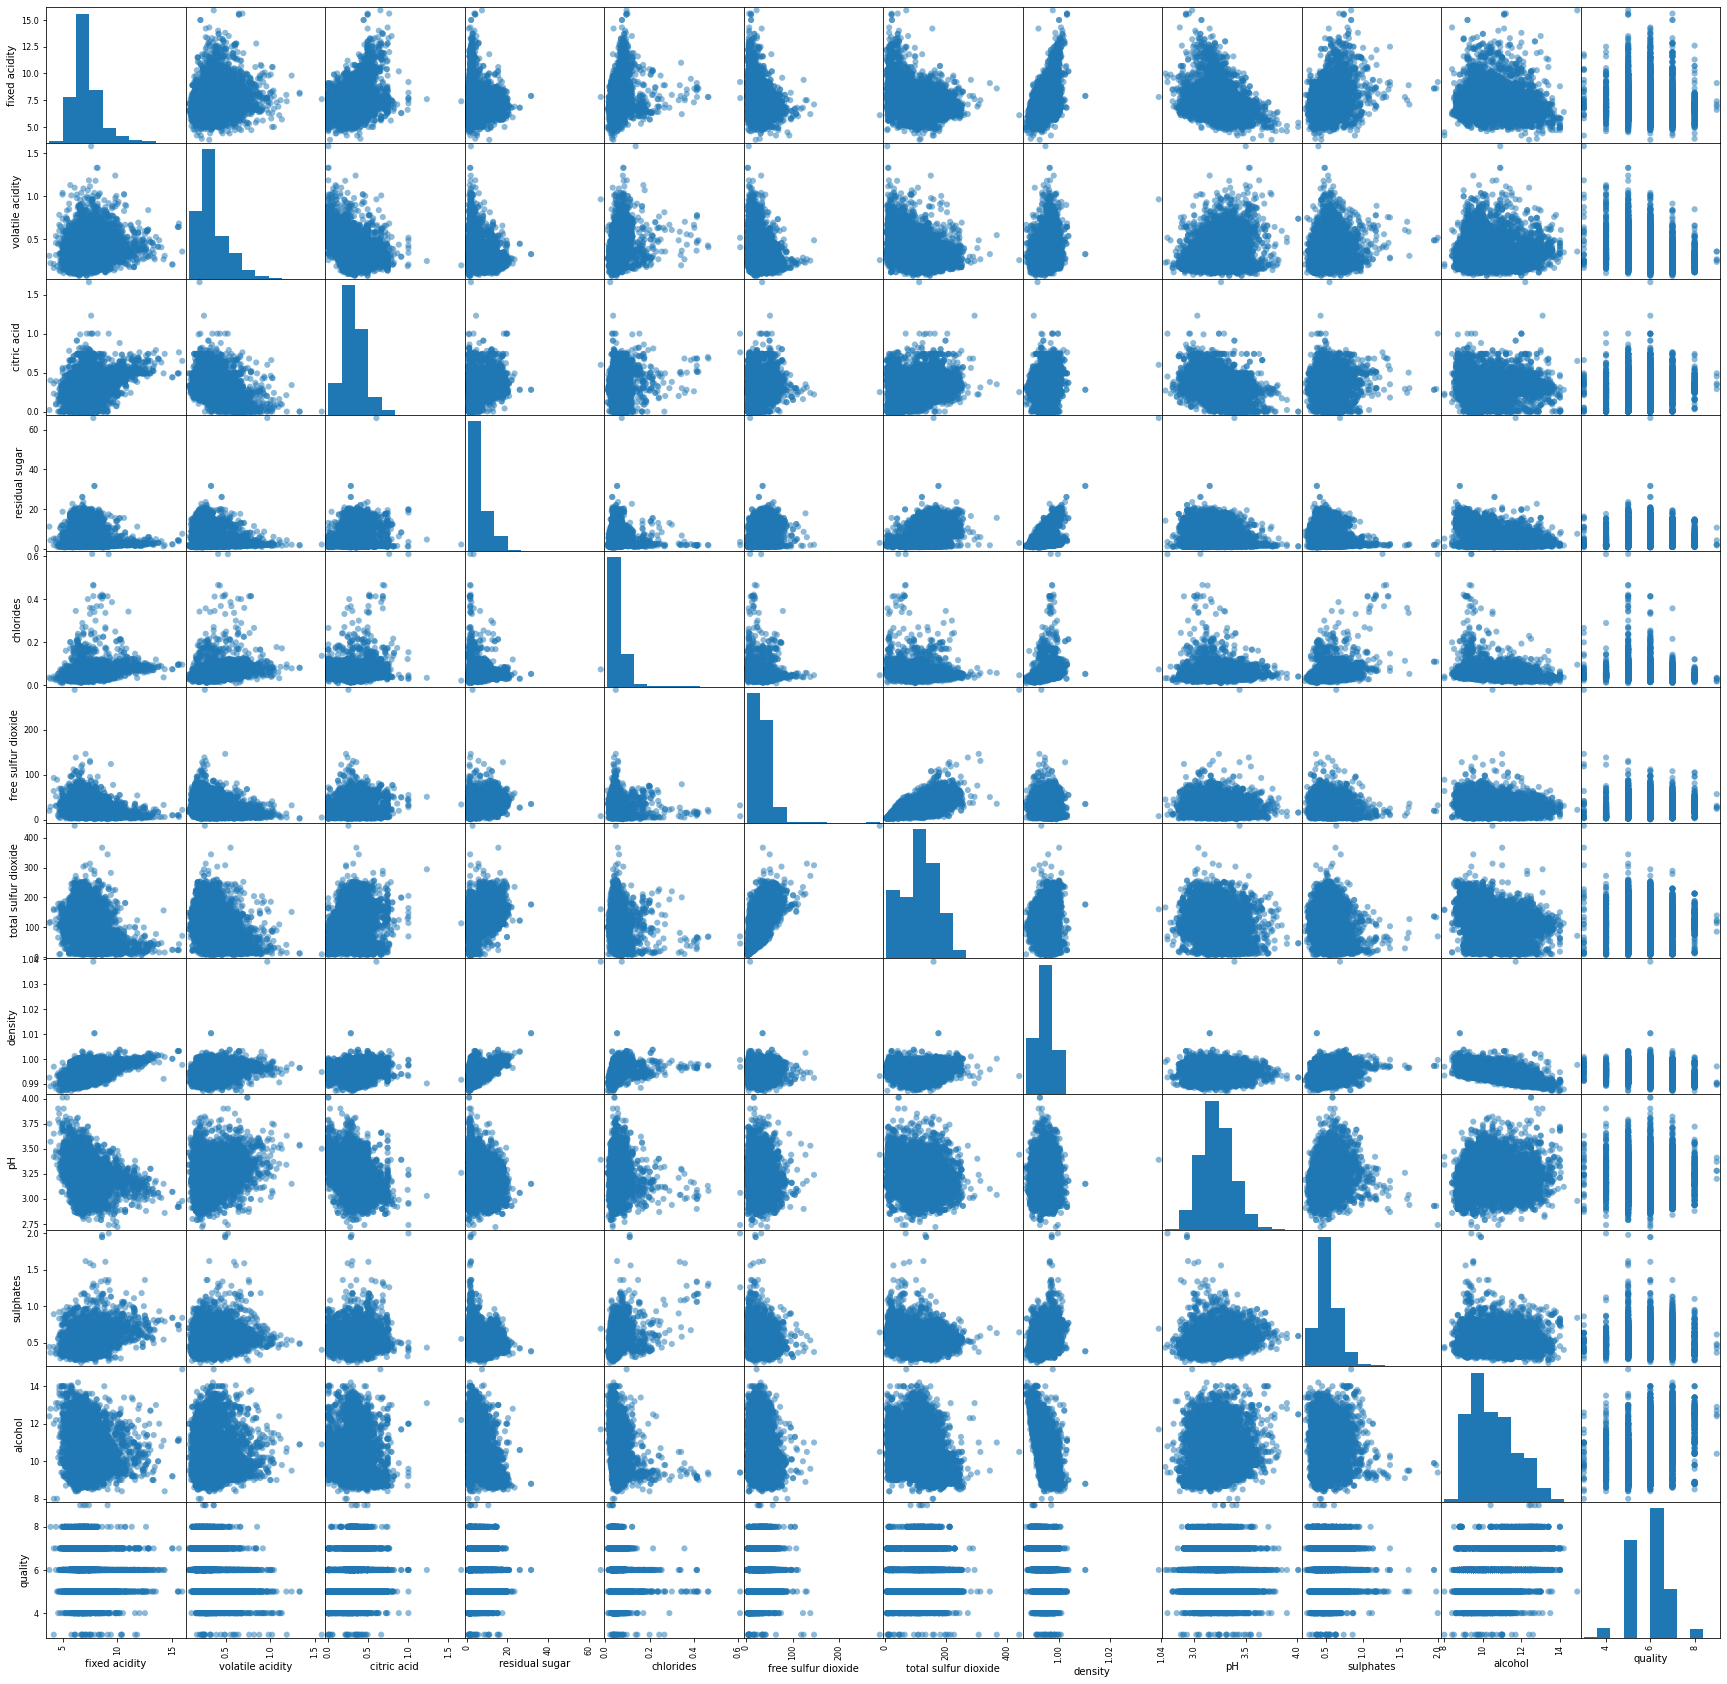

In [13]:
_ = pd.plotting.scatter_matrix(wine_df, figsize= (30,30), s=150)

"On remarque déjà qu'il y'a bcp plus de vin Blanc que de vin Rouge ce qui explique les chiffres plus élevés pour le vin blanc"

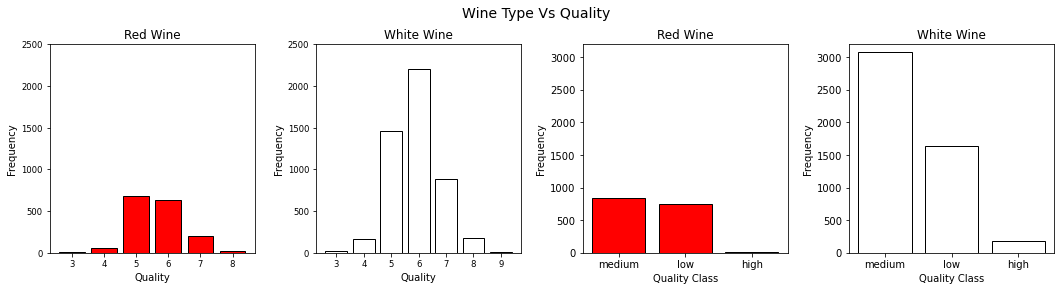

In [14]:
# on va observer dans un premier temps a distribution de la qualité des vins par type de vin

fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type Vs Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = wine_df.quality[wine_df.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = wine_df.quality[wine_df.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality Class")
ax3.set_ylabel("Frequency") 
rw_q = wine_df.quality_label[wine_df.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality Class")
ax4.set_ylabel("Frequency") 
ww_q = wine_df.quality_label[wine_df.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', edgecolor='black', linewidth=1, tick_label =ww_q[0])
"On remarque déjà qu'il y'a bcp plus de vin Blanc que de vin Rouge ce qui explique les chiffres plus élevés pour le vin blanc"



### Statistiques descriptives

In [15]:
# mtn on va sortir les stats descriptive par type de vin

wine_df[wine_df.type =="red"].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [16]:
wine_df[wine_df.type =="white"].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [17]:
# mtn on va sortir les stats par qualité de vin

wine_df[wine_df.quality_label == "low"].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    2384.000000       2384.000000  2384.000000     2384.000000   
mean        7.329992          0.397410     0.304178        5.646225   
std         1.268400          0.187971     0.162936        4.917239   
min         4.200000          0.100000     0.000000        0.600000   
25%         6.500000          0.260000     0.210000        1.800000   
50%         7.100000          0.337500     0.295000        2.900000   
75%         7.800000          0.500000     0.400000        8.525000   
max        15.900000          1.580000     1.000000       23.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  2384.000000          2384.000000           2384.000000  2384.000000   
mean      0.064404            29.480495            119.277055     0.995756   
std       0.042812            19.844383             61.887639     0.002464   
min       0.009000             2.000000              6.000000     0.987220   
25%       0.043000            14.000000             68.000000     0.993960   
50%       0.052000            26.000000            124.000000     0.996000   
75%       0.077000            42.000000            167.000000     0.997540   
max       0.611000           289.000000            440.000000     1.003150   

                pH    sulphates      alcohol      quality  
count  2384.000000  2384.000000  2384.000000  2384.000000  
mean      3.214522     0.524270     9.873544     4.884228  
std       0.161311     0.143764     0.841746     0.357197  
min       2.740000     0.250000     8.000000     3.000000  
25%       3.110000     0.440000     9.300000     5.000000  
50%       3.200000     0.500000     9.600000     5.000000  
75%       3.310000     0.580000    10.400000     5.000000  
max       3.900000     2.000000    14.900000     5.000000

In [18]:
wine_df[wine_df.quality_label == "medium"].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3915.000000       3915.000000  3915.000000     3915.000000   
mean        7.163946          0.306955     0.326664        5.324291   
std         1.313999          0.139826     0.134743        4.683706   
min         3.800000          0.080000     0.000000        0.700000   
25%         6.400000          0.210000     0.260000        1.800000   
50%         6.900000          0.270000     0.310000        3.000000   
75%         7.600000          0.360000     0.390000        7.900000   
max        15.600000          1.040000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3915.000000          3915.000000           3915.000000  3915.000000   
mean      0.051709            30.960281            113.505747     0.994164   
std       0.028906            16.332851             53.572899     0.003098   
min       0.012000             1.000000              6.000000     0.987110   
25%       0.036000            19.000000             81.000000     0.991680   
50%       0.045000            29.000000            116.000000     0.994000   
75%       0.058000            41.000000            150.000000     0.996500   
max       0.415000           112.000000            294.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  3915.000000  3915.000000  3915.000000  3915.000000  
mean      3.220577     0.536539    10.807612     6.275607  
std       0.160674     0.150758     1.201098     0.446877  
min       2.720000     0.220000     8.400000     6.000000  
25%       3.110000     0.430000     9.800000     6.000000  
50%       3.210000     0.510000    10.800000     6.000000  
75%       3.330000     0.610000    11.700000     7.000000  
max       4.010000     1.950000    14.200000     7.000000

In [19]:
wine_df[wine_df.quality_label == "high"].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     198.000000        198.000000   198.000000      198.000000   
mean        6.850000          0.291187     0.333889        5.351010   
std         1.144918          0.118123     0.102157        4.161541   
min         3.900000          0.120000     0.030000        0.800000   
25%         6.200000          0.210000     0.280000        2.000000   
50%         6.800000          0.275000     0.320000        4.050000   
75%         7.300000          0.350000     0.367500        7.575000   
max        12.600000          0.850000     0.740000       14.800000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  198.000000           198.000000            198.000000  198.000000   
mean     0.040778            34.505051            117.479798    0.992487   
std      0.015679            17.084070             41.693584    0.002883   
min      0.014000             3.000000             12.000000    0.987130   
25%      0.030250            24.000000             96.000000    0.990350   
50%      0.036500            34.000000            118.500000    0.991780   
75%      0.045000            43.000000            145.000000    0.994075   
max      0.121000           105.000000            212.500000    1.000600   

               pH   sulphates     alcohol     quality  
count  198.000000  198.000000  198.000000  198.000000  
mean     3.225354    0.511313   11.691414    8.025253  
std      0.156431    0.164466    1.273262    0.157289  
min      2.880000    0.250000    8.500000    8.000000  
25%      3.130000    0.380000   11.000000    8.000000  
50%      3.230000    0.480000   12.000000    8.000000  
75%      3.330000    0.600000   12.600000    8.000000  
max      3.720000    1.100000   14.000000    9.000000

In [20]:
# avant de rentrer dans le vif du sujet, on va remplacer les valeur de red et white par des chiffres

from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
wine_df_encoded = l_encoder.fit_transform(wine_df.type.values)
wine_df_encoded

wine_df['color'] = wine_df_encoded
print(wine_df)

'''
wine_df_quality_label = l_encoder.fit_transform(wine_df.quality_label.values)
wine_df['quality_label'] = wine_df_quality_label
wine_df
'''

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

"\nwine_df_quality_label = l_encoder.fit_transform(wine_df.quality_label.values)\nwine_df['quality_label'] = wine_df_quality_label\nwine_df\n"

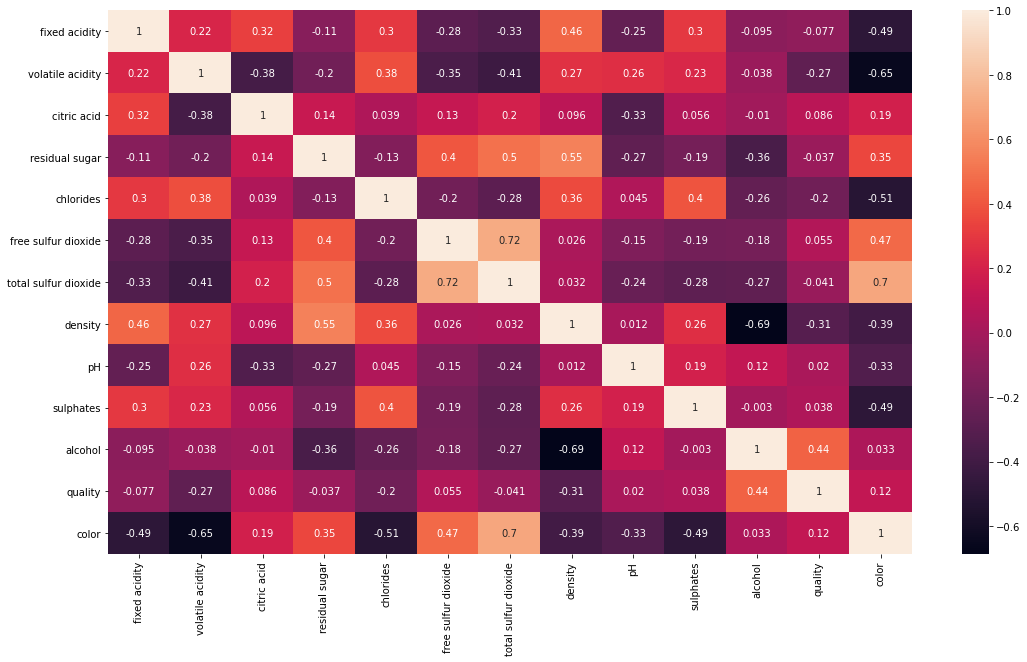

'corrélation neg entre acidité et couleur (vin blanc bien moins acide que le rouge)'

In [21]:
"On a pu relever qq informations primaires sur les vins, mtn on va creuser un petit nos analyses"
#on va chercher des potentielles corrélations entre nos features
plt.figure(figsize=(18, 10))
wine_df_without_quality_label = wine_df.drop(["quality_label"],axis=1)
corrMatrix = wine_df_without_quality_label.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
"ici les corr sont dans lensemble basse, on remarque néanmoins une forte corrélation entre free et total surfur dioxde (logique car les deux sont liés)"
"on remaruqe aussi une corrélation de 0.5 entre le sucre et le total sulfure dyoxyde (0.4 avec le free sulfure dyoxyde)"
"denité a haute corrélation avec le sucre mais négative avec l'alcool"
"On remarque une forte corrélation entre les taux de sulfure et le type de vin nottament le blanc, c'est ce quon avait observé tout a l'heure "
"c'est ce qu'on avait observé avec un fort taux de sulfure pour le vin blanc"
"corrélation neg entre acidité et couleur (vin blanc bien moins acide que le rouge)"



C:\Users\bilal\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\bilal\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


'on confirme aussi la corrélation forte entre total et free sulfur dioxyde'

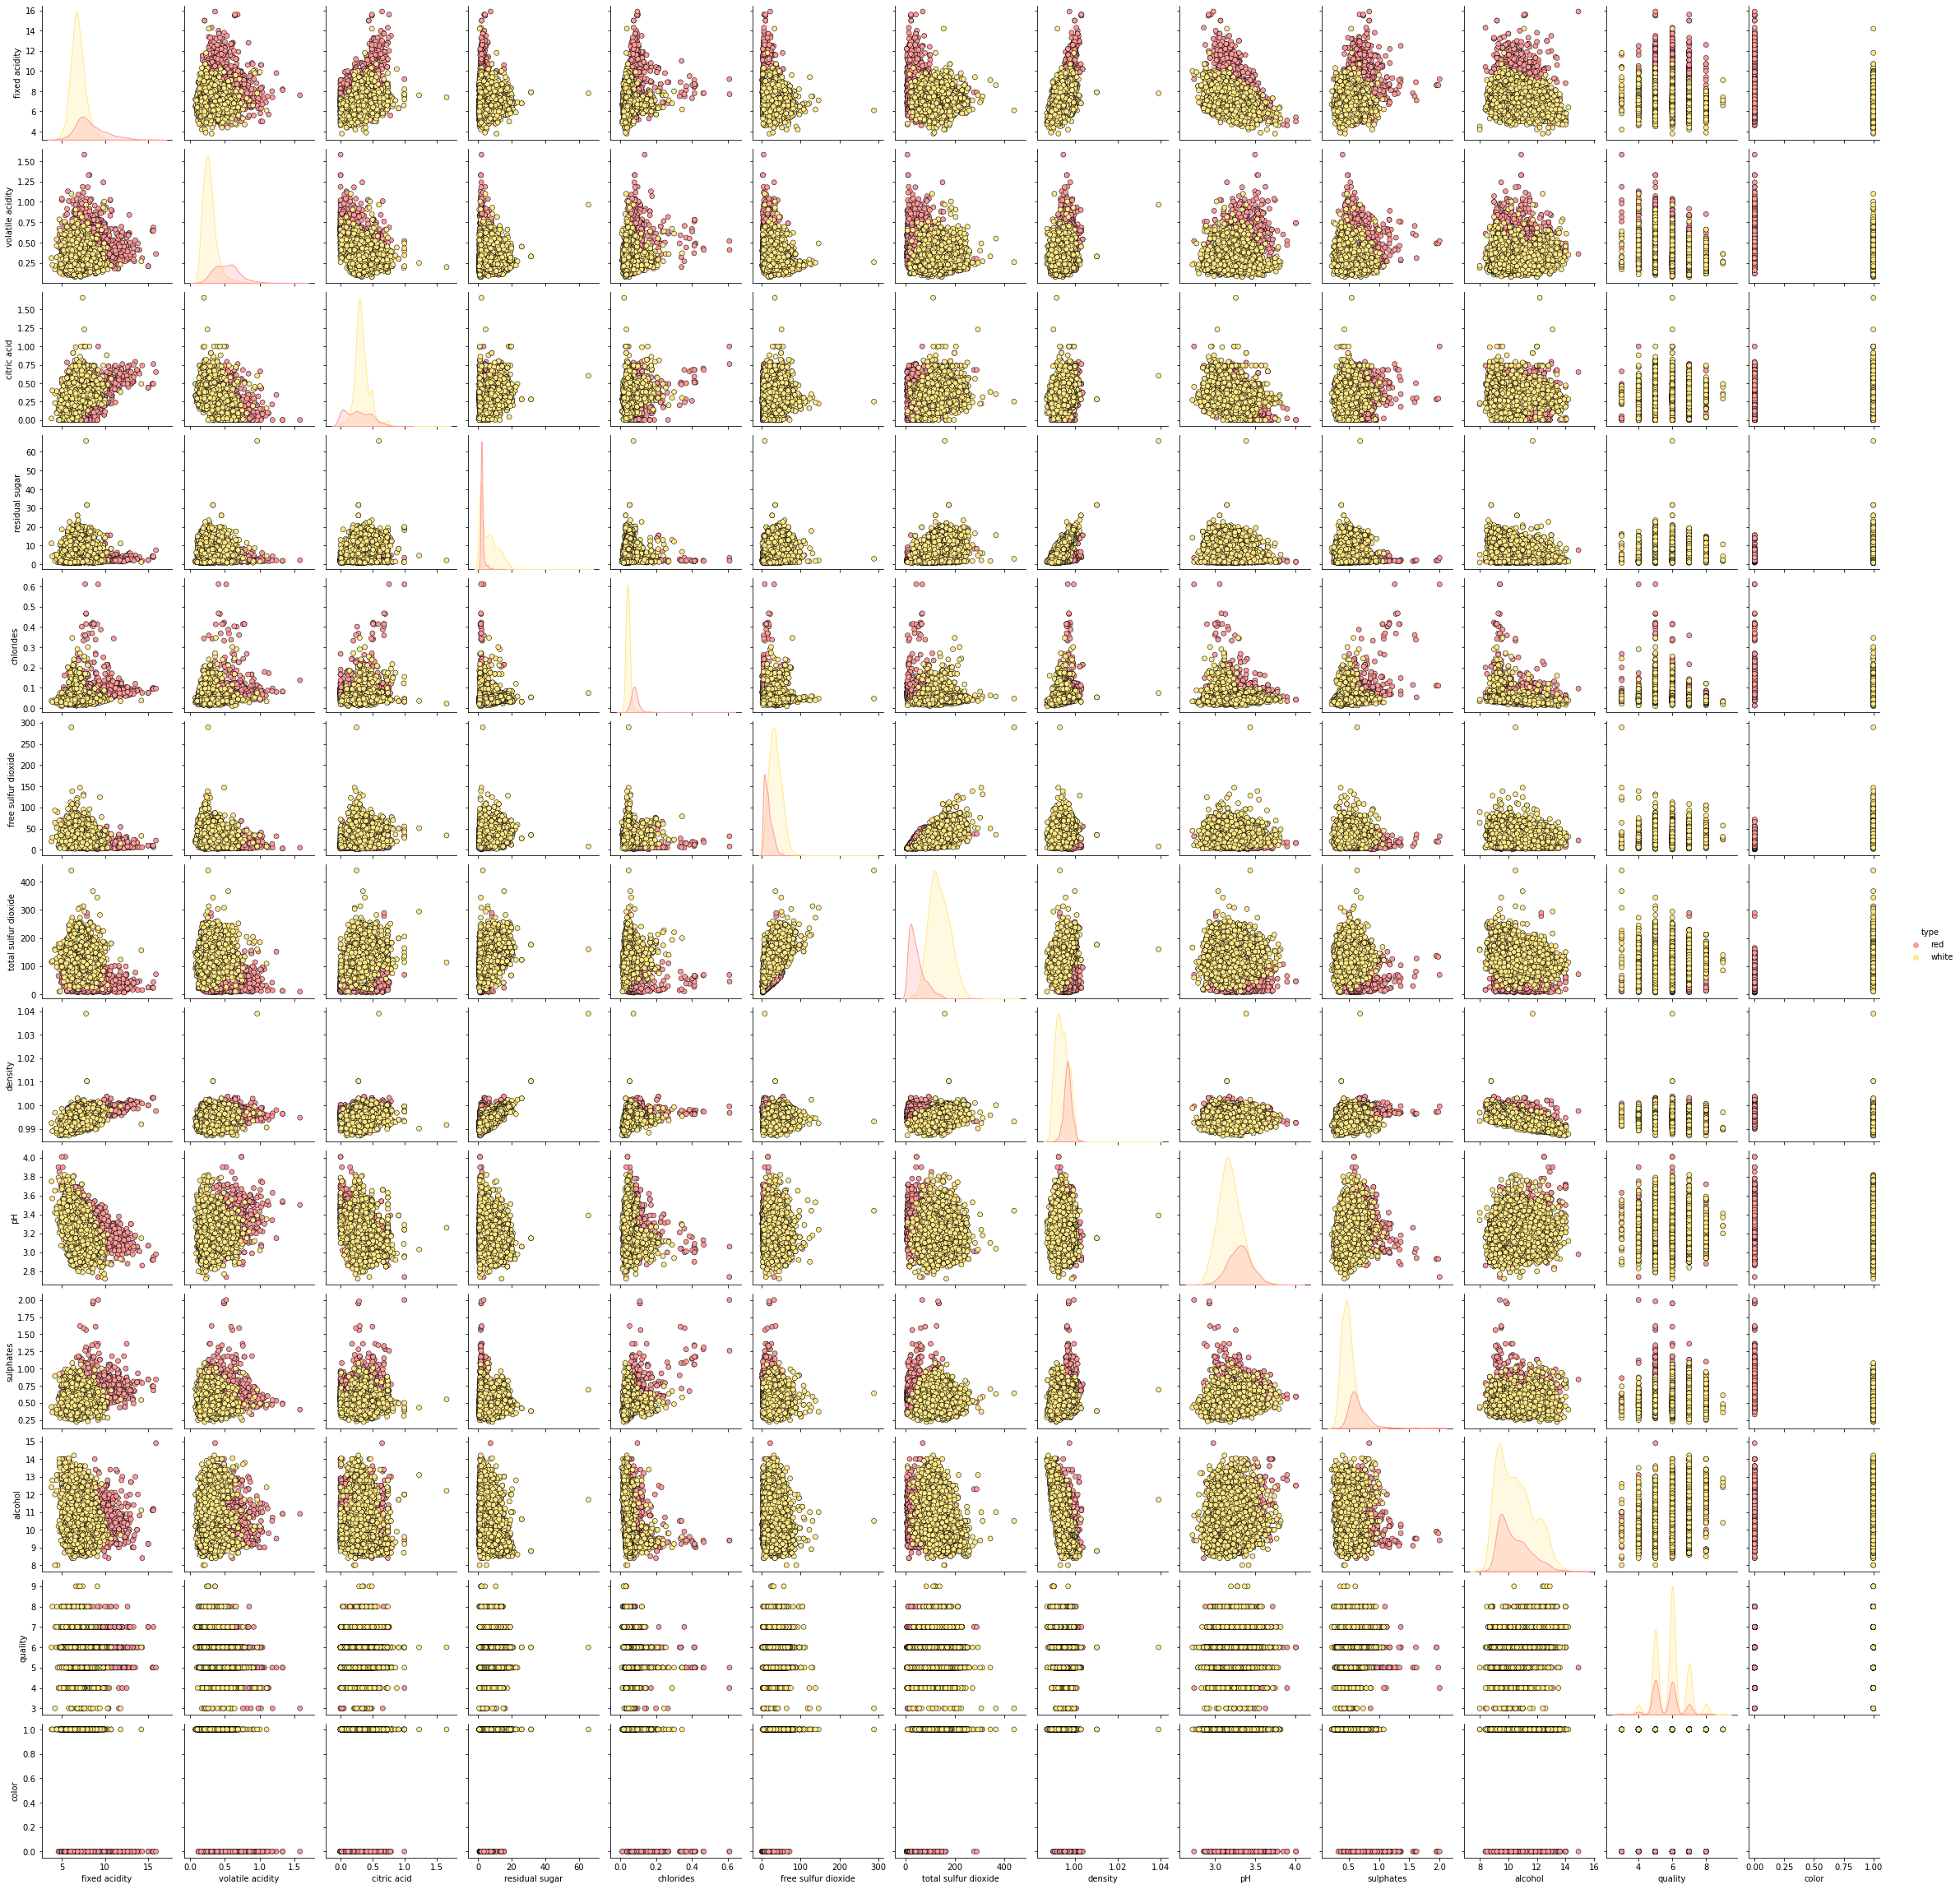

In [22]:
#on va plot un pairplot pour mieux voir les relations entre features

sns.pairplot(data = wine_df, hue='type', palette={'red': '#FF9999', 'white': '#FFE888'},plot_kws=dict(edgecolor='black', linewidth=0.5))
t = fig.suptitle('Wine Attributes Pairwise Plots by Types', fontsize=24)
"Observation :  comme ce qu'on a vu taleur, + de sucre et de soufre dans le vin blanc, sulfate + acidité plus élévé dans le vin rouge"
"ca confirme aussi la corrélation positive entre densité et sucre et négative entre densité et alcool"
"on confirme aussi la corrélation forte entre total et free sulfur dioxyde"

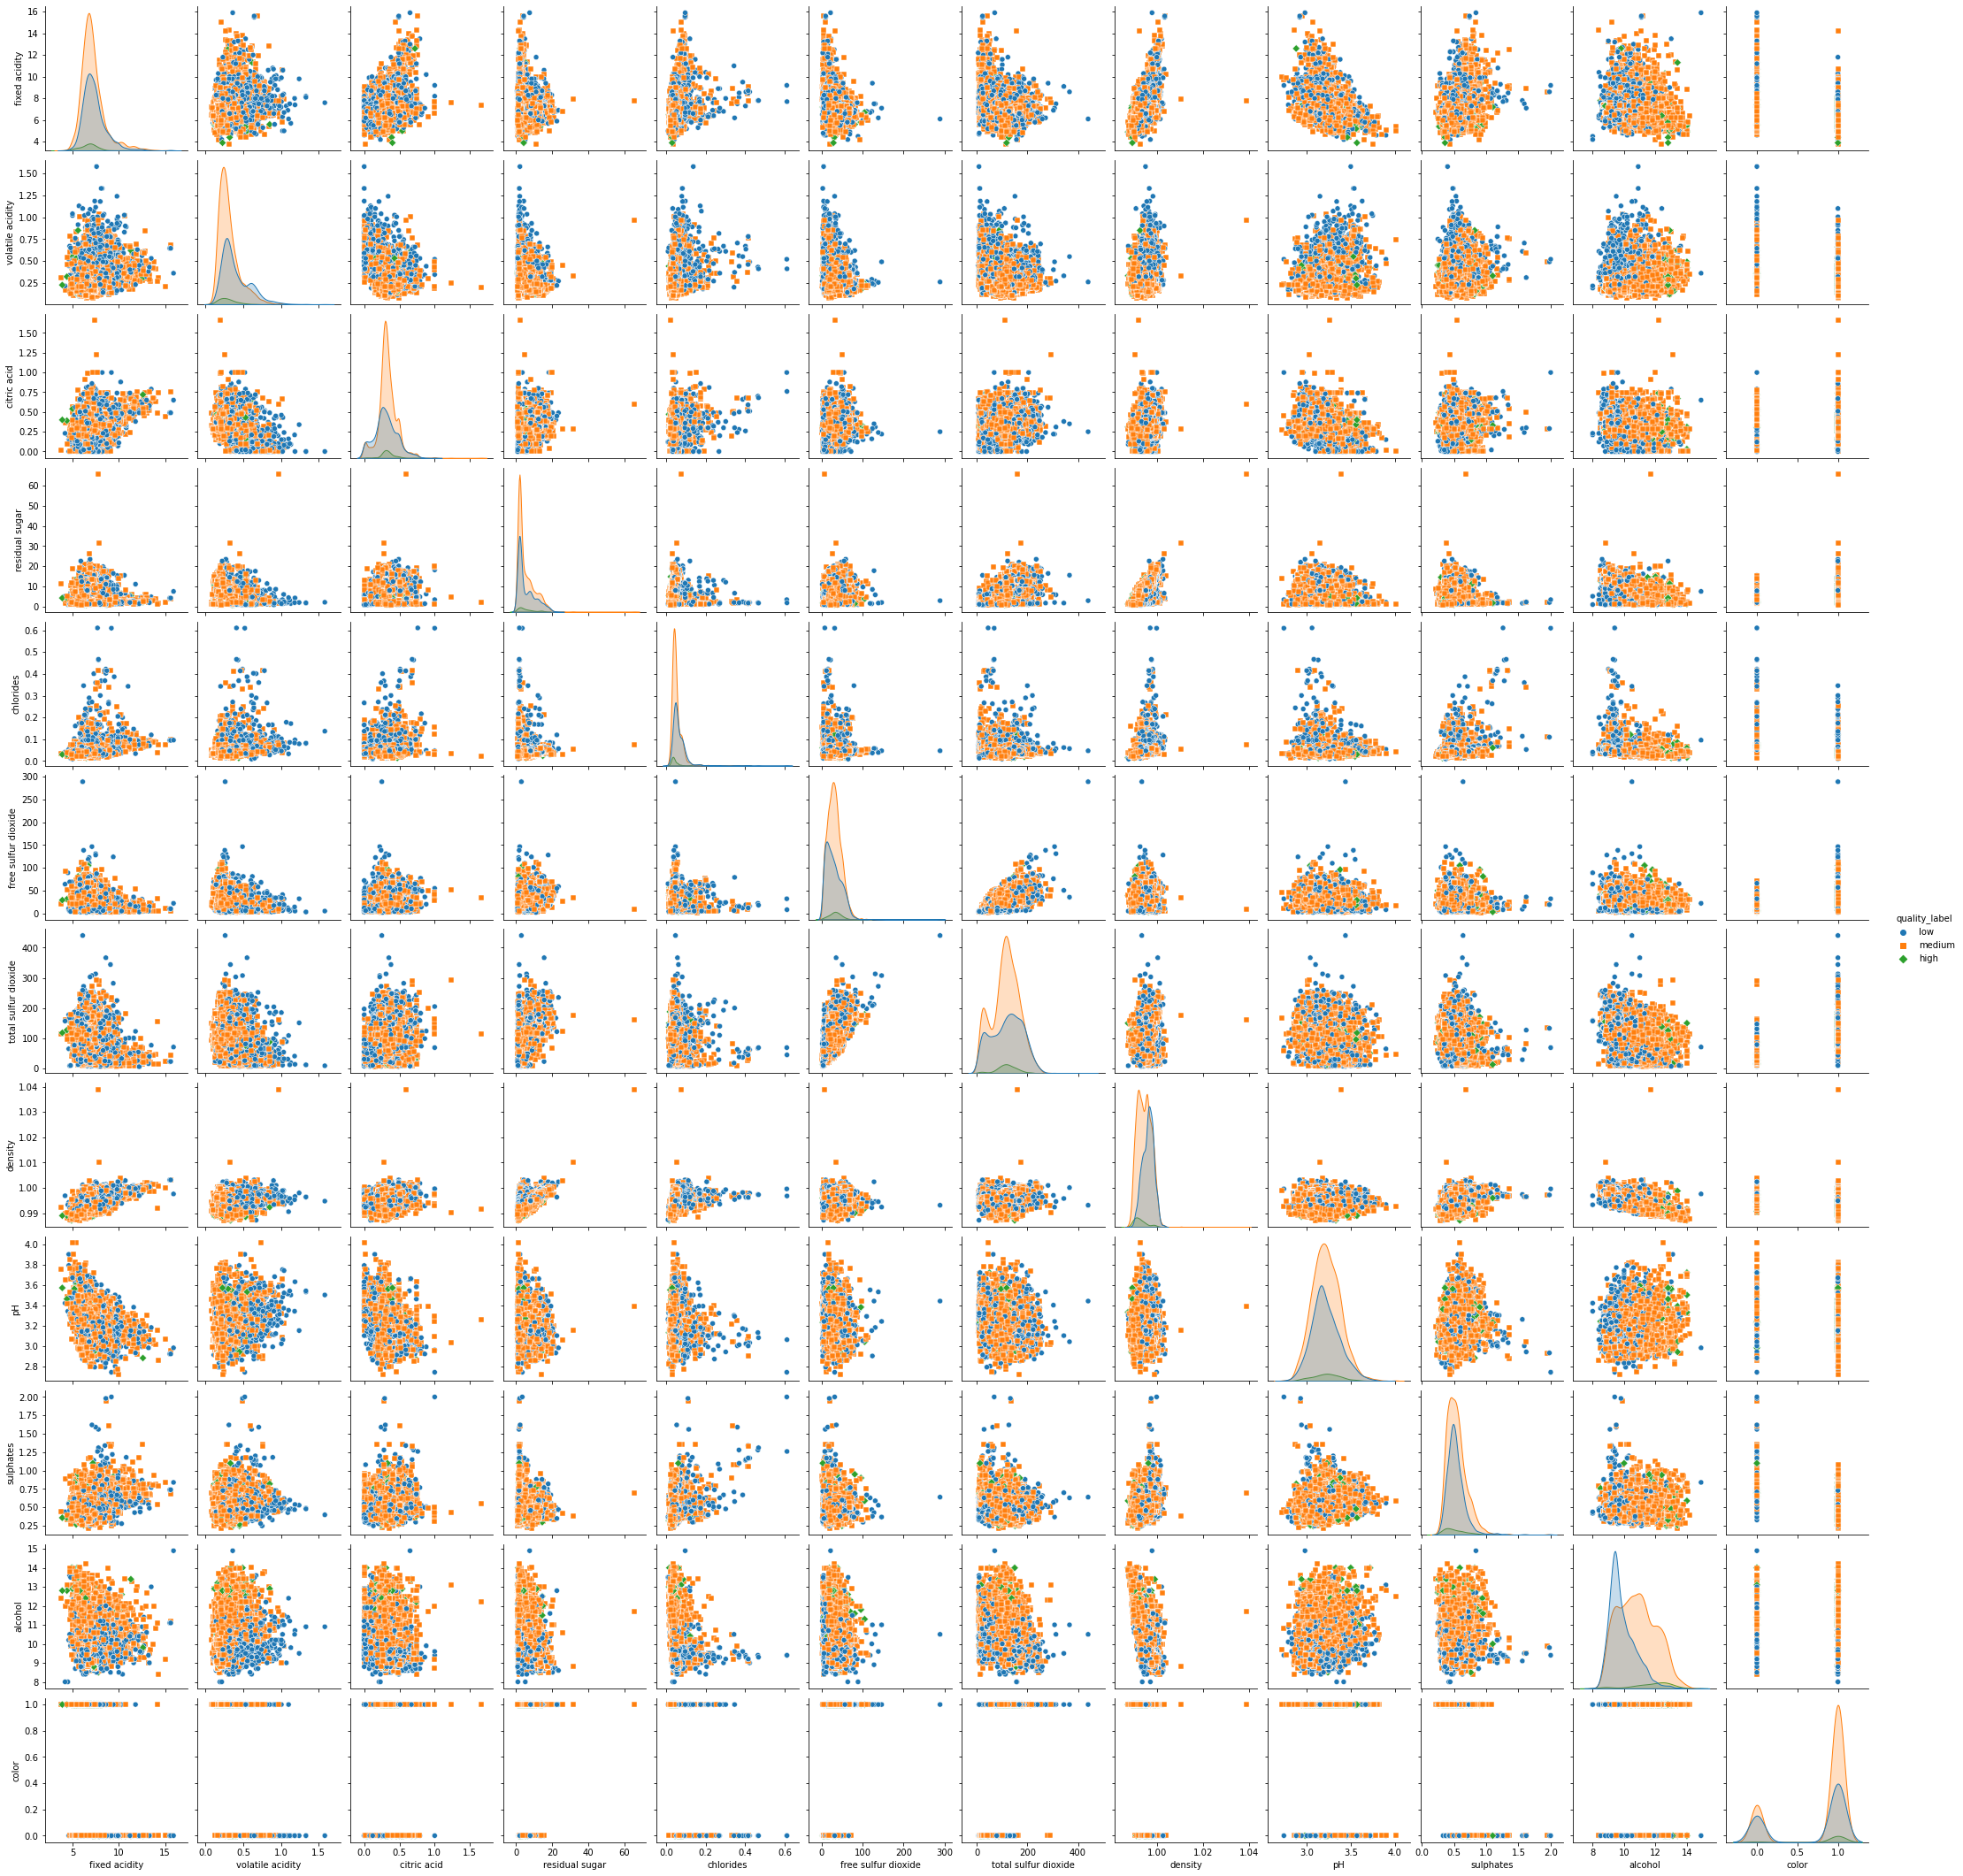

In [24]:
# on va creer n pairplot par quality label cette fois
cols = wine_df.columns
cols = cols.drop('quality')
g = sns.pairplot(data = wine_df.loc[:, cols], hue='quality_label',markers=["o", "s", "D"])


"""
On observe bien ce qu'on a dit: 
- + t'es high - t'es acide (fixid + volatile)
- le - sucrée c'est le medium
- le - sulfate c'est le high
- la corrélation l'a + forte est entre le free et total dioxde de souffre
"""

"On remarque bien que + la qualité augmente, + le taux d'alcool augmente"

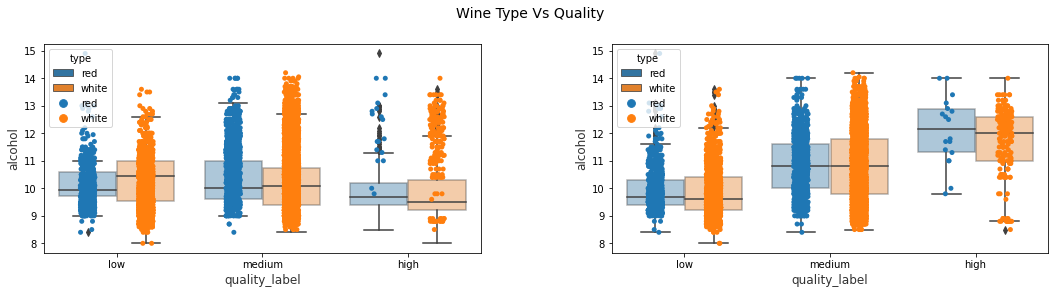

In [42]:
# on va utiliser un box plot pour le vin rouge et blanc en fct de leur qualité et voir le taux d'alcool qu'il ont

fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type Vs Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
sns.boxplot(x= "quality",y= "alcohol",hue="type",data=wine_df,boxprops={'alpha': 0.4})
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
sns.stripplot(data=wine_df, x="quality_label", y="alcohol",
              hue="type", dodge=True)
ax2 = fig.add_subplot(1,2, 2)
sns.boxplot(x= "quality_label",y= "alcohol",hue="type",data=wine_df,boxprops={'alpha': 0.4})
ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
sns.stripplot(data=wine_df, x="quality_label", y="alcohol",
              hue="type", dodge=True)
"On remarque bien que + la qualité augmente, + le taux d'alcool augmente"


"Ici on peut clairement voir que le taux d'acidité diminue quand la qualité augmente"

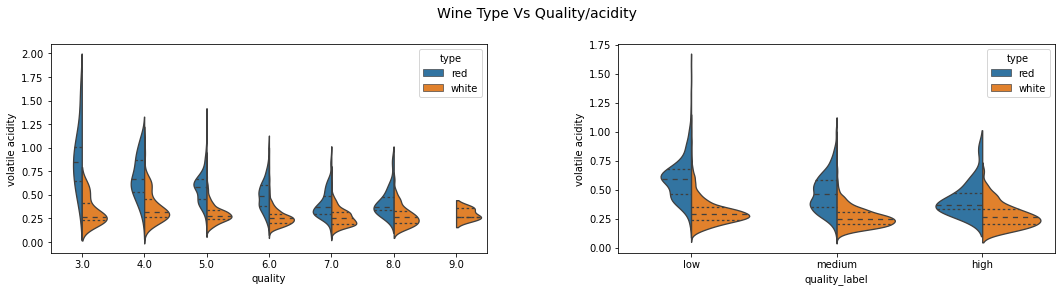

In [54]:
# on va rentrer dans le detail et voir le lien entre acidité/qualité de vin
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type Vs Quality/acidity", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
sns.violinplot(x='quality', y='volatile acidity', hue='type', data=wine_df, split=True, inner='quart', linewidth=1.3)


ax1 = fig.add_subplot(1,2, 2)
sns.violinplot(x='quality_label', y='volatile acidity', hue='type', data=wine_df, split=True, inner='quart', linewidth=1.3)


"Ici on peut clairement voir que le taux d'acidité diminue quand la qualité augmente + le rouge est + acide que le blanc"

C:\Users\bilal\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\bilal\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


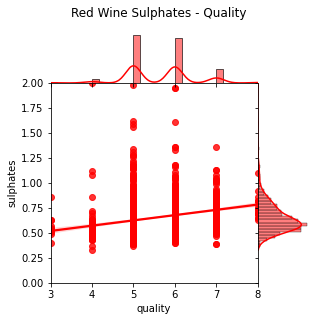

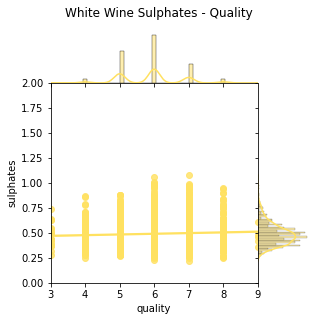

In [60]:
# on va faire la mm chose avec le sulfate


r = sns.jointplot(x='quality', y='sulphates', data=wine_df[wine_df.color == 0], # , ax = ax
                  kind='reg', ylim=(0, 2), color='red', space=0, size=4.5, ratio=4)
r.ax_joint.set_xticks(list(range(3,9)))
rfig = r.fig 
rfig.subplots_adjust(top=0.9)
t = rfig.suptitle('Red Wine Sulphates - Quality', fontsize=12)

w = sns.jointplot(x='quality', y='sulphates', data=wine_df[wine_df.color == 1],
                   kind='reg', ylim=(0, 2), color='#FFE160', space=0, size=4.5, ratio=4)
w.ax_joint.set_xticks(list(range(3,10)))
wfig = w.fig 
wfig.subplots_adjust(top=0.9)
t = wfig.suptitle('White Wine Sulphates - Quality', fontsize=12)

In [61]:
g = sns.FacetGrid(wine_df, col='type', hue='quality_label', col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, 'volatile acidity', 'alcohol', alpha=0.9, edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

g = sns.FacetGrid(wine_df, col='type', hue='quality_label', col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('green', 3))
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9, edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

"Dans le premier graph :  vin blanc ont + d'alcool + sont moins acide + plus qualitatif "
"Dans le 2ème graph : vin blanc à + de souffre mais est - acide que le rouge"

C:\Users\bilal\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


### Préparation des données

In [81]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
wine_df_label_encoded = l_encoder.fit_transform(wine_df.quality_label.values)


wine_df["quality_label_num"] = wine_df_label_encoded

wine_df

# quality label_num : 0 high, 1 low, 2 medium
#color: 0 red, 1 white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type quality_label  color  quality_label_num  
0         9.4      5.0    red           low      0                  1  
1         9.8      5.0    red           low      0                  1  
2         9.8      5.0    red           low      0                  1  
3         9.8      6.0    red        medium      0                  2  
4         9.4      5.0    red           low      0                  1  
...       ...      ...    ...           ...    ...                ...  
4893     11.2      6.0  white        medium      1                  2  
4894      9.6      5.0  white           low      1                  1  
4895      9.4      6.0  white        medium      1                  2  
4896     12.8      7.0  white        medium      1                  2  
4897     11.8      6.0  white        medium      1                  2  

[6497 rows x 16 columns]

In [84]:
# il y'a énormément de données, il serait judicieux de faire une ACP

from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

wine_df
X= wine_df.drop(["type",'quality_label'],axis=1)
X

y = wine_df['quality_label_num']
y


0       1
1       1
2       1
3       2
4       1
       ..
4893    2
4894    1
4895    2
4896    2
4897    2
Name: quality_label_num, Length: 6497, dtype: int32

In [85]:
#attention a pas oublier de scale les données avant de faire une ACP
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X,y)

StandardScaler()

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<BarContainer object of 14 artists>

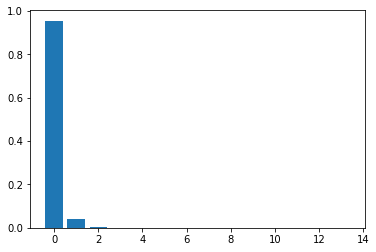

In [93]:
# mtn que j'ai enlever les valeur texte + scale mes données + split en train/test set, on peut faire notre ACP

pca = PCA()
pca.fit(X_train)
exp_variance = pca.explained_variance_ratio_
exp_variance

plt.bar(range(pca.n_components_),exp_variance)

"Ce qui est très intéréssant ici c'est que on peut quasiment tout expliqué avec seulement 3 features"



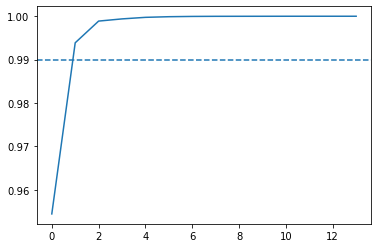

In [102]:
# On va entrer plus dans le detail de notre PCA

cum_exp_variance = pca.explained_variance_ratio_.cumsum()
cum_exp_variance

plt.plot(range(pca.n_components_),cum_exp_variance)
plt.axhline(y=0.99, linestyle='--')

# on voit clairement que 2 features suffisent pour expliquer l'ensemble de nos observations (+ de 99% de la variance préservée)



In [105]:
pca = PCA(n_components = 2)
#on fait le pca sur les features de train
X_train_pca  = pca.fit_transform(X_train)
#on fait le pca sur les features de test
X_test_pca  = pca.transform(X_test)

In [149]:
#mtn on va pouvoir train nos differents algo de ML 
# on commence par un KNN

from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier( n_neighbors = 12, weights = 'distance')
knn.fit(X_train_pca, y_train)


KNeighborsClassifier(n_neighbors=12, weights='distance')

In [150]:
from sklearn.metrics import accuracy_score
y_train_pred = knn.predict(X_train_pca) 

print("KNN training accuracy : ", accuracy_score(y_train, y_train_pred)) 


KNN training accuracy :  1.0


In [152]:
y_test_pred = knn.predict(X_test_pca)
print("KNN test accuracy : ", accuracy_score(y_test, y_test_pred)) 


KNN test accuracy :  0.6853846153846154


In [166]:
#on va faire une RL pour voir ls résultats (vu que c multiclass on va plutot faire un softmax regression)
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train_pca,y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [174]:
soft_y_train_pred = softmax_reg.predict(X_train_pca)
print("Softmax Regression training accuracy : ", accuracy_score(y_train, soft_y_train_pred)) 


Softmax Regression training accuracy :  0.6024629593996537


In [175]:
soft_y_test_pred = softmax_reg.predict(X_test_pca)
print("SoftMAx Regression test accuracy : ", accuracy_score(y_test, soft_y_test_pred)) 


SoftMAx Regression test accuracy :  0.6169230769230769
